# Imports

In [618]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as preprocessing

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, classification_report


pd.set_option('future.no_silent_downcasting', True)

df = pd.read_csv('loan_data.csv') # Dataset: https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data/data

# Inspect The Dataset

In [619]:
df.head(10)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
5,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1
6,26.0,female,Bachelor,93471.0,1,RENT,35000.0,EDUCATION,12.42,0.37,3.0,701,No,1
7,24.0,female,High School,95550.0,5,RENT,35000.0,MEDICAL,11.11,0.37,4.0,585,No,1
8,24.0,female,Associate,100684.0,3,RENT,35000.0,PERSONAL,8.90,0.35,2.0,544,No,1
9,21.0,female,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3.0,640,No,1


In [620]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [621]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [622]:
df.dtypes

person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

# Preprocessing

## Check Missing Values

In [623]:
df.isnull().sum() # No missing values

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [624]:
df["person_education"].unique()

array(['Master', 'High School', 'Bachelor', 'Associate', 'Doctorate'],
      dtype=object)

## Convert Datatypes

In [625]:
# Float to int
df['person_age'] = df['person_age'].astype(int)
df['person_income'] = df['person_income'].astype(int)
df['cb_person_cred_hist_length'] = df['cb_person_cred_hist_length'].astype(int)
df['loan_amnt'] = df['loan_amnt'].astype(int)

# Categorical to numerical
df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].replace({'Yes': 1, 'No': 0}).astype(int)
df['person_gender'] = df['person_gender'].replace({'male' : 0, 'female': 1}).astype(int)
df['person_education'] = df['person_education'].replace({'High School': 0, 'Associate': 1, 'Bachelor': 2, 'Master': 3, 'Doctorate': 4}).astype(int)

# One-Hot Encode
columns = ['person_home_ownership', 'loan_intent']
encoder = preprocessing.OneHotEncoder(sparse_output=False)
encoded_df = pd.DataFrame(encoder.fit_transform(df[columns]), columns=encoder.get_feature_names_out(columns)).astype(int)
df = pd.concat([df, encoded_df], axis=1).drop(columns, axis=1)

## Review the data

In [626]:
df.head(20)

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22,1,3,71948,0,35000,16.02,0.49,3,561,...,0,0,0,1,0,0,0,0,1,0
1,21,1,0,12282,0,1000,11.14,0.08,2,504,...,0,0,1,0,0,1,0,0,0,0
2,25,1,0,12438,3,5500,12.87,0.44,3,635,...,1,0,0,0,0,0,0,1,0,0
3,23,1,2,79753,0,35000,15.23,0.44,2,675,...,0,0,0,1,0,0,0,1,0,0
4,24,0,3,66135,1,35000,14.27,0.53,4,586,...,0,0,0,1,0,0,0,1,0,0
5,21,1,0,12951,0,2500,7.14,0.19,2,532,...,0,0,1,0,0,0,0,0,0,1
6,26,1,2,93471,1,35000,12.42,0.37,3,701,...,0,0,0,1,0,1,0,0,0,0
7,24,1,0,95550,5,35000,11.11,0.37,4,585,...,0,0,0,1,0,0,0,1,0,0
8,24,1,1,100684,3,35000,8.90,0.35,2,544,...,0,0,0,1,0,0,0,0,1,0
9,21,1,0,12739,0,1600,14.74,0.13,3,640,...,0,0,1,0,0,0,0,0,0,1


In [627]:
df.dtypes

person_age                          int64
person_gender                       int64
person_education                    int64
person_income                       int64
person_emp_exp                      int64
loan_amnt                           int64
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length          int64
credit_score                        int64
previous_loan_defaults_on_file      int64
loan_status                         int64
person_home_ownership_MORTGAGE      int64
person_home_ownership_OTHER         int64
person_home_ownership_OWN           int64
person_home_ownership_RENT          int64
loan_intent_DEBTCONSOLIDATION       int64
loan_intent_EDUCATION               int64
loan_intent_HOMEIMPROVEMENT         int64
loan_intent_MEDICAL                 int64
loan_intent_PERSONAL                int64
loan_intent_VENTURE                 int64
dtype: object

# Plotting

## Correlation Matrix

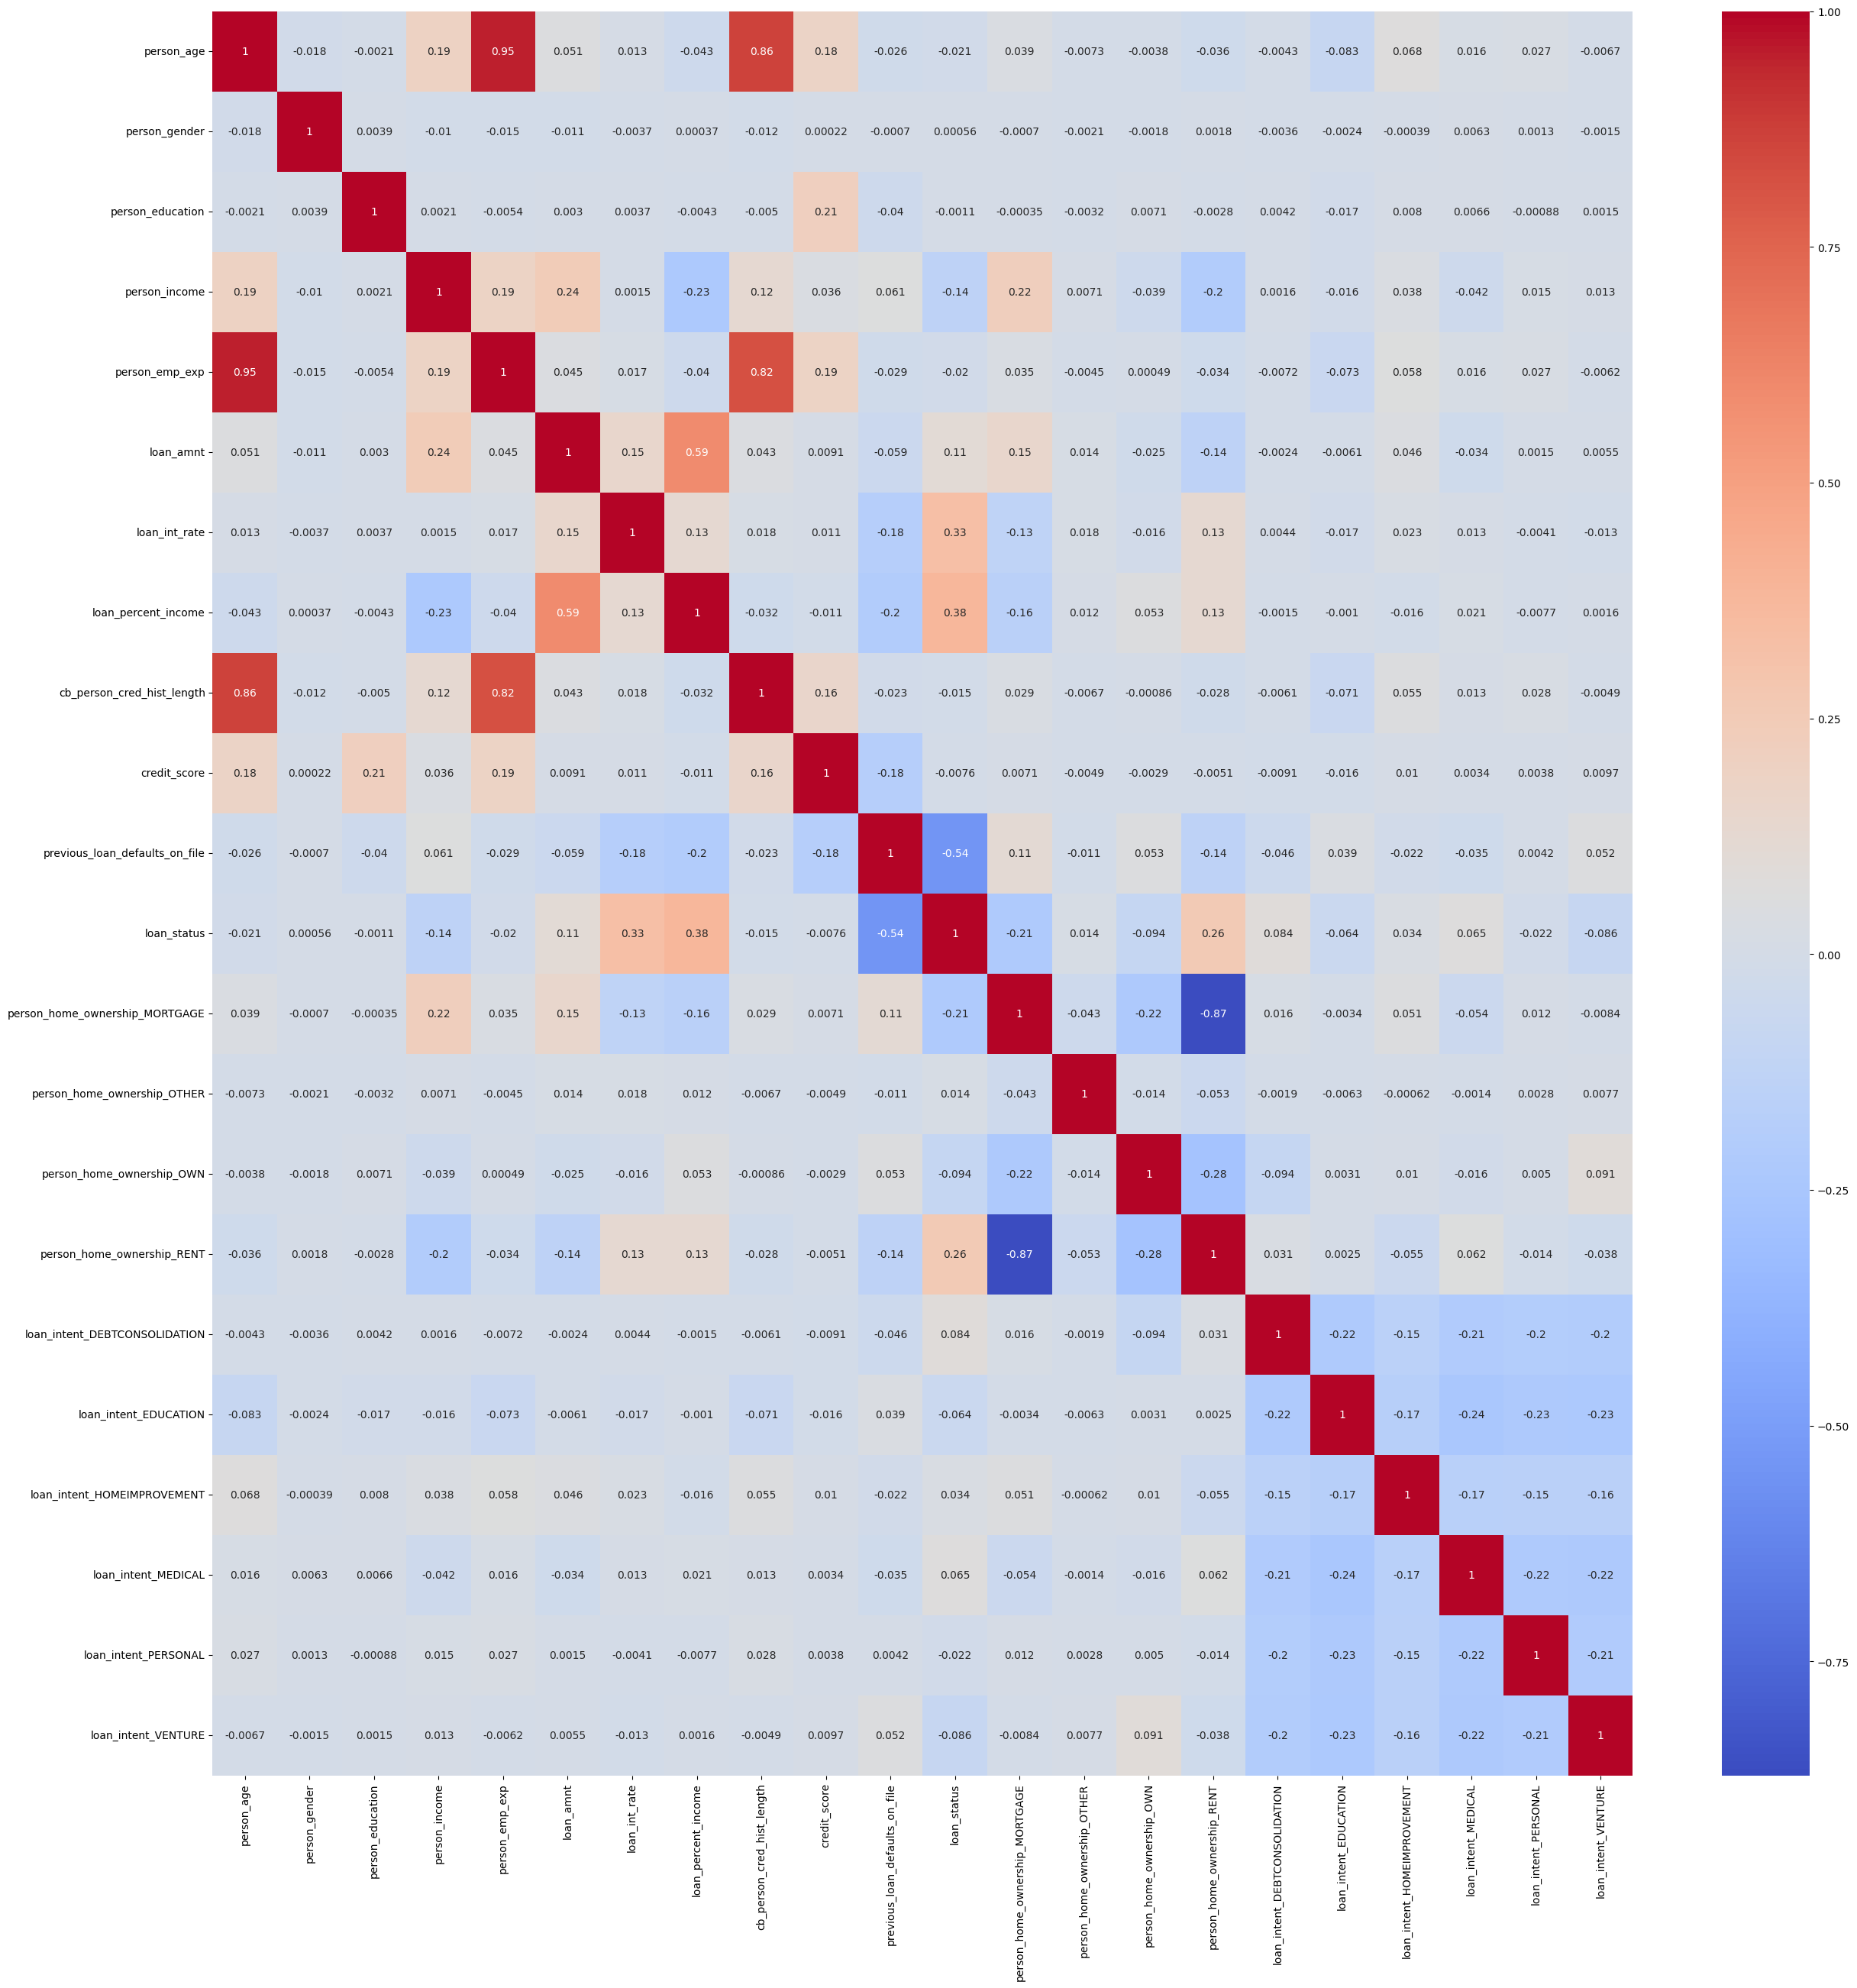

In [628]:
# Correlation matrix
corr = df.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.savefig('plots/correlation_matrix.png')
plt.show()

## Loan Status Ratios By Loan Intent

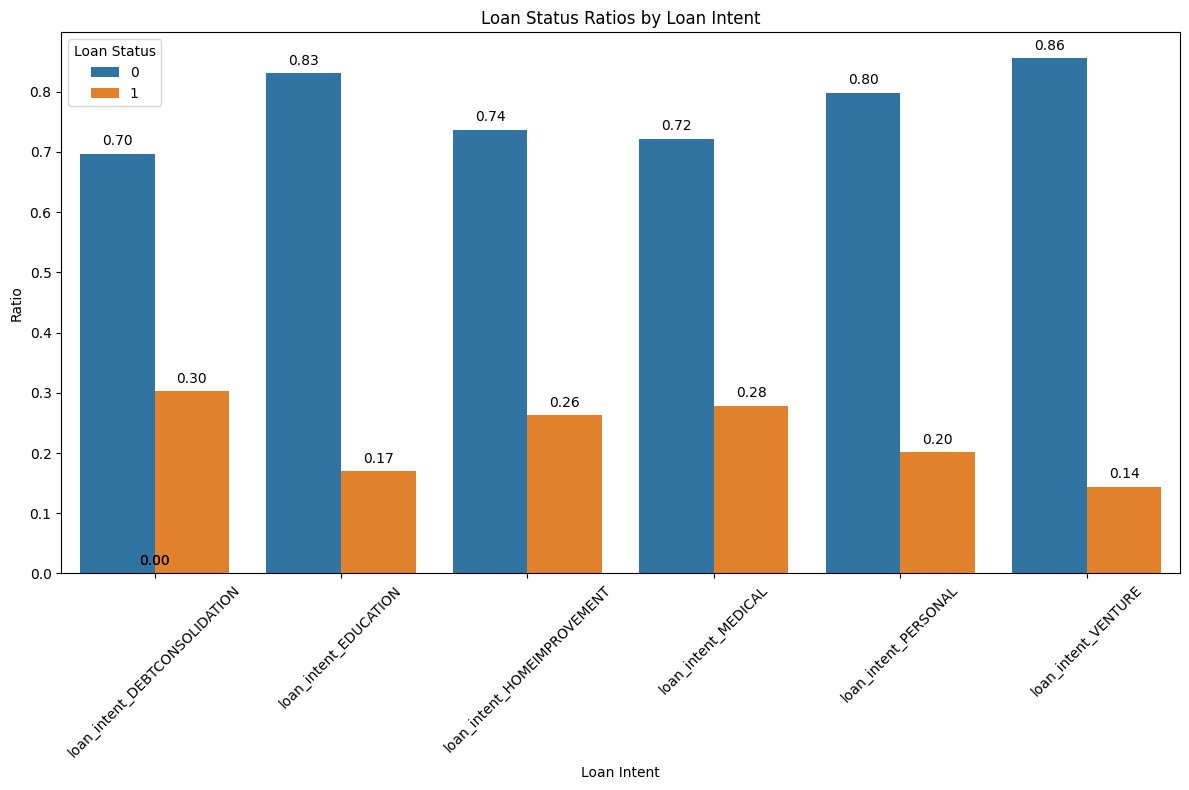

In [629]:
loan_intent_columns = [
    'loan_intent_DEBTCONSOLIDATION', 
    'loan_intent_EDUCATION', 
    'loan_intent_HOMEIMPROVEMENT', 
    'loan_intent_MEDICAL', 
    'loan_intent_PERSONAL', 
    'loan_intent_VENTURE'
]

ratios_df = pd.DataFrame()

# Calculate the loan status ratio for each loan intent
for column in loan_intent_columns:
    filtered_df = df[df[column] == 1]
    
    # Calculate the ratio of loan_status
    loan_status_ratio = filtered_df['loan_status'].value_counts(normalize=True).reset_index()
    loan_status_ratio.columns = ['loan_status', 'ratio']
    loan_status_ratio['loan_intent'] = column

    ratios_df = pd.concat([ratios_df, loan_status_ratio], ignore_index=True)

plt.figure(figsize=(12, 8))
sns.barplot(x='loan_intent', y='ratio', hue='loan_status', data=ratios_df)

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.title('Loan Status Ratios by Loan Intent')
plt.xlabel('Loan Intent')
plt.ylabel('Ratio')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')
plt.tight_layout()

plt.savefig('plots/loan_grant_ratio_by_loan_intent.png')
plt.show()


## Distribution of Loan Amounts

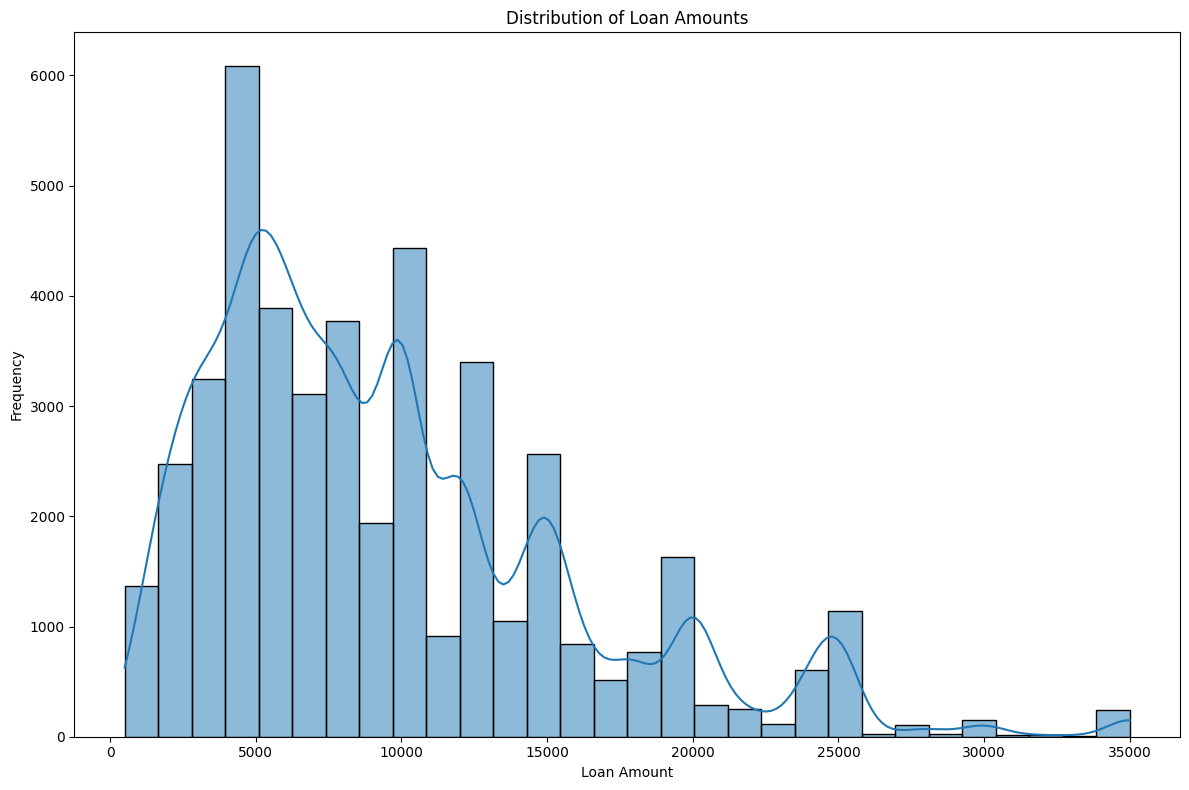

In [630]:
# Plot the distribution of loan amounts
plt.figure(figsize=(12, 8))
sns.histplot(df['loan_amnt'], bins=30, kde=True)

plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.tight_layout()

plt.savefig('plots/loan_amount_distribution.png')
plt.show()

## Loan Status by Credit Score

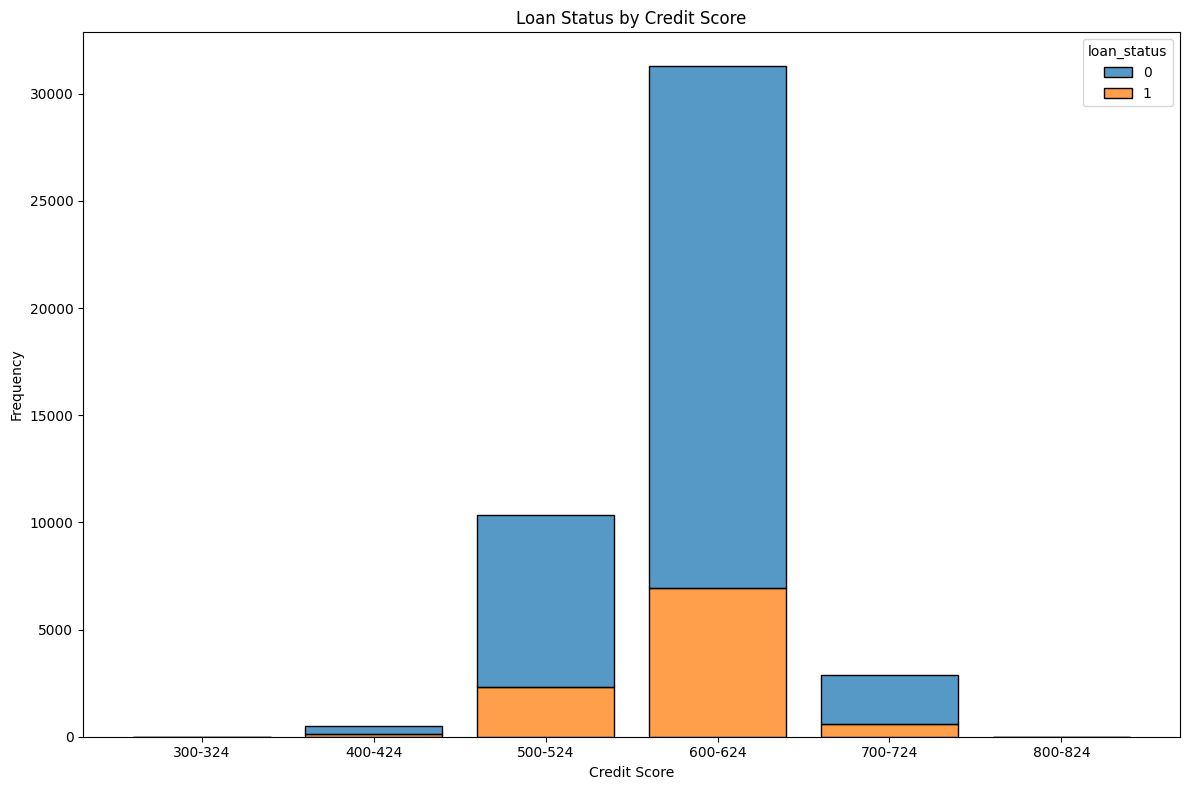

In [631]:
# Bin the credit scores per 100 points
bins = list(range(300, 901, 100))
labels = [f'{i}-{i+24}' for i in range(300, 900, 100)]
credit_score_bin = pd.cut(df['credit_score'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(12, 8))
sns.histplot(data=df, x=credit_score_bin, hue='loan_status', multiple='stack', shrink=0.8)

plt.title('Loan Status by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.tight_layout()

plt.savefig('plots/credit_score_by_loan_status.png')
plt.show()

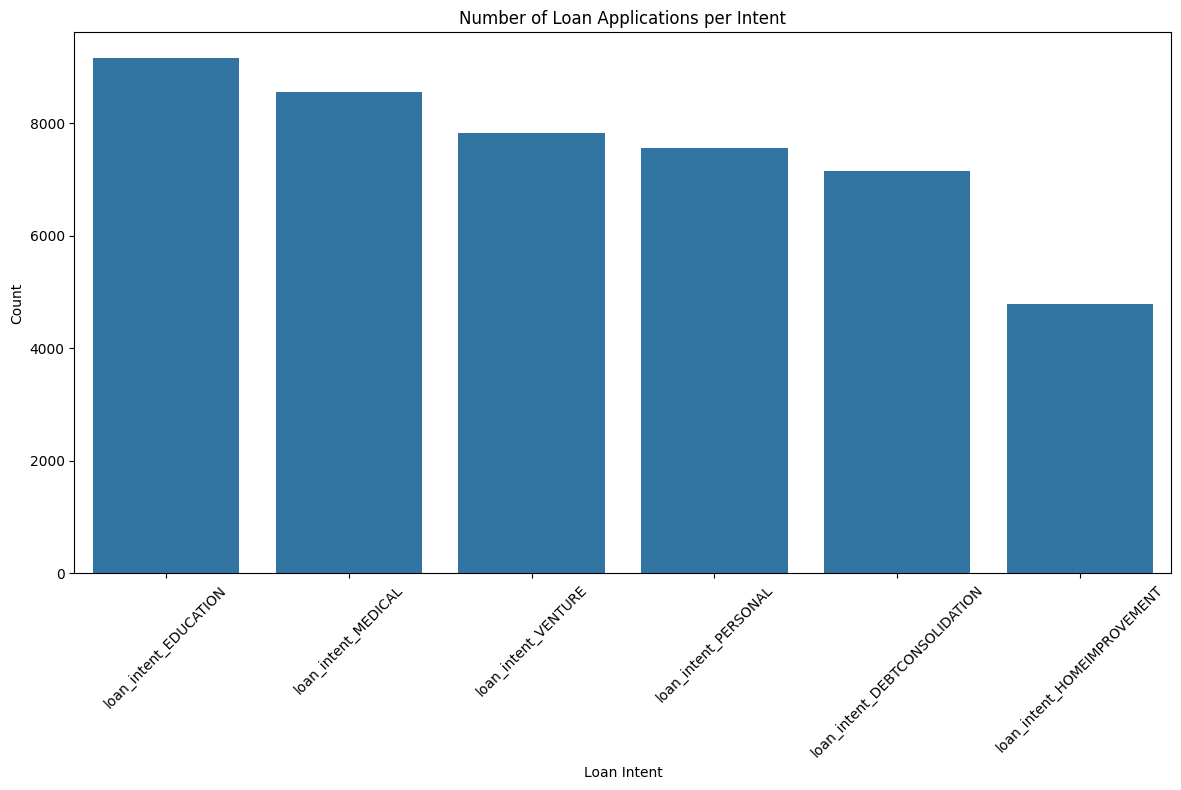

In [632]:
loan_intent_columns = [
    'loan_intent_DEBTCONSOLIDATION', 
    'loan_intent_EDUCATION', 
    'loan_intent_HOMEIMPROVEMENT', 
    'loan_intent_MEDICAL', 
    'loan_intent_PERSONAL', 
    'loan_intent_VENTURE'
]

melted_df = df.melt(id_vars=['credit_score'], value_vars=loan_intent_columns, var_name='loan_intent', value_name='value')
melted_df = melted_df[melted_df['value'] == 1]

# Aggregate the data to count the number of loan applications per intent
agg_df = melted_df['loan_intent'].value_counts().reset_index()
agg_df.columns = ['loan_intent', 'count']

plt.figure(figsize=(12, 8))
sns.barplot(x='loan_intent', y='count', data=agg_df)

plt.title('Number of Loan Applications per Intent')
plt.xlabel('Loan Intent')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('plots/loan_applications_per_intent.png')
plt.show()

# Training

## Cross-Validation

In [633]:
k_values = [3, 5, 7, 10]

model = RandomForestClassifier()

cv_scores = {}

# Loop through k values
for k in k_values:
    scores = cross_val_score(model, X, y, cv=k)
    cv_scores[k] = scores
    print(f'Cross-Validation Scores for k={k}: {scores}')
    print(f'Mean Cross-Validation Score for k={k}: {scores.mean()}')

# Compare results
for k, scores in cv_scores.items():
    print(f'k={k}: Mean Score={scores.mean()}, Std Dev={scores.std()}')

Cross-Validation Scores for k=3: [0.92466667 0.9206     0.93113333]
Mean Cross-Validation Score for k=3: 0.9254666666666665
Cross-Validation Scores for k=5: [0.92144444 0.91733333 0.91944444 0.92977778 0.93611111]
Mean Cross-Validation Score for k=5: 0.9248222222222221
Cross-Validation Scores for k=7: [0.93031576 0.90200653 0.9256494  0.90822834 0.923771   0.92968264
 0.93512757]
Mean Cross-Validation Score for k=7: 0.9221116054753509
Cross-Validation Scores for k=10: [0.92622222 0.89311111 0.91555556 0.92377778 0.92111111 0.91533333
 0.92377778 0.93933333 0.93488889 0.93844444]
Mean Cross-Validation Score for k=10: 0.9231555555555555
k=3: Mean Score=0.9254666666666665, Std Dev=0.004337263175304455
k=5: Mean Score=0.9248222222222221, Std Dev=0.007048544197821436
k=7: Mean Score=0.9221116054753509, Std Dev=0.011378378486259904
k=10: Mean Score=0.9231555555555555, Std Dev=0.012919427423004151


## Split

In [634]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train

In [635]:
model.fit(X_train, y_train)

RandomForestClassifier()

## Predictions & Evaluation

In [636]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.9286666666666666
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      6990
           1       0.90      0.77      0.83      2010

    accuracy                           0.93      9000
   macro avg       0.92      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000



In [637]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
model = RandomForestClassifier()

# Initialize Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Train the model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Evaluate the model
y_pred = best_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.9294444444444444
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      6990
           1       0.90      0.77      0.83      2010

    accuracy                           0.93      9000
   macro avg       0.92      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000

